# MNIST softmax regression

This notebook shows the basic steps in developing an equivalent "hello world" for machinelearning. The purpose here is to develop a model that will recognize handwritten digits (ie, 0 through 9). It's based on the regular Tensorflow tutorial ["MNIST For ML Beginners"](https://www.tensorflow.org/get_started/mnist/beginners).

In [1]:
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnist_helper import read_data_sets

C:\Users\svto\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Some settings
 - ipython [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html) to render matplotlib inline
 - numpy will print the full array when showing matrices, instead of ellided ones
 - `mnist_path` defines the path where the MNIST dataset can be found (as tar.gz)

In [2]:
%matplotlib inline
np.set_printoptions(threshold=np.nan)
mnist_path = 'C:/src/tf-playground/mnist'

Read data using mnist helper from tensorflow convinient tutorial namespace. 

In [3]:
mnist = read_data_sets(mnist_path, one_hot=True)

Extracting C:/src/tf-playground/mnist\train-images-idx3-ubyte.gz
Extracting C:/src/tf-playground/mnist\train-labels-idx1-ubyte.gz
Extracting C:/src/tf-playground/mnist\t10k-images-idx3-ubyte.gz
Extracting C:/src/tf-playground/mnist\t10k-labels-idx1-ubyte.gz


Defines the placeholders and variables required

- `X` is a placeholder for the actual image data. By using `None` as the height dimension, Tensorflow is told that the height may variable (so `X` can be sized to include any number of images, in a batching style). Note that each row is a complete image, simply flattened out (27 * 27 = 784)
- `W` and `b` defines the weights and biases used by the model itself
- `Y` and `Y_` refers to our guesses and labels (correct guess value) respectively

In [4]:
X = tf.placeholder(tf.float32, [None, 784], 'X')
W = tf.Variable(tf.zeros([784, 10]), 'W')
b = tf.Variable(tf.zeros([10]), 'b')
Y = tf.nn.softmax(tf.matmul(X, W) + b)
Y_ = tf.placeholder(tf.float32, [None, 10], 'Y_')

- `cross_entropy` is a tensor that gives a measurement of how well we guessed correctly
- `train_step` is a operation that Tensorflow defines which seeks to mimize the `cross_entropy` tensor

In [5]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_, logits=Y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
init = tf.global_variables_initializer().run()

Training loop

In [6]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    step_v, cross_entropy_v = sess.run([train_step, cross_entropy], feed_dict={X: batch_xs, Y_: batch_ys})
    if (_ % 50 == 0):
        print('{0}'.format(cross_entropy_v))

2.3025851249694824
1.8641164302825928
1.7576203346252441
1.7650949954986572
1.7075380086898804
1.707948923110962
1.6718696355819702
1.6960574388504028
1.6206905841827393
1.6356022357940674
1.6388943195343018
1.6100654602050781
1.5759425163269043
1.651667594909668
1.6154967546463013
1.6126132011413574
1.6268665790557861
1.655892252922058
1.6146594285964966
1.612619161605835


Now the model has been trained, and we verify the accuracy of the resultant weights and biases against the test set.

In [7]:
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(accuracy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels})

0.9074001

Evaluate the tensorflow variable to obtain a numpy matrix of actual weights for each class. To visualize the individual class weights, we first split `We` by columns, and then reshape into 28 x 28 individual numpy matrices.

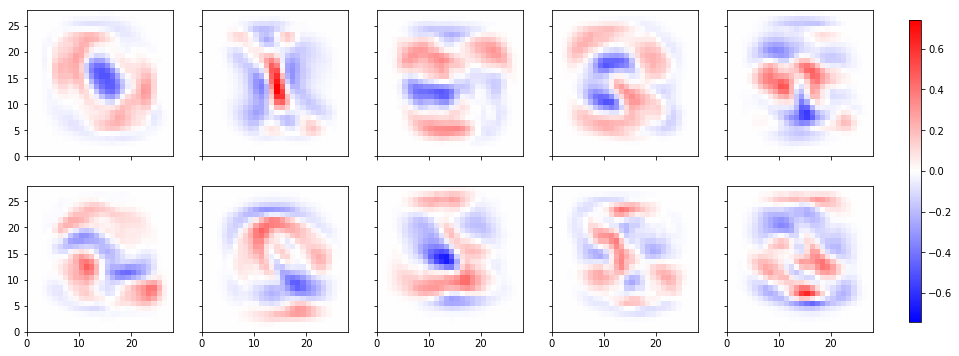

In [8]:
# prep data
We = W.eval()
Wec = [(np.reshape(x, (28, 28))) for x in np.hsplit(We, 10)]
titles = ['Class: {}'.format(n) for n in range(10)]
vmin = min([m.min() for m in Wec])
vmax = max([m.max() for m in Wec])
# ensure the mean is 0, otherwise the base/neutral is non-white
vminmax = max(abs(vmin), vmax)

# create subplots
fig, ax = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(16.9, 5.915))
for index, (image, title) in enumerate(zip(Wec, titles)):
    (row, col) = (math.floor(index / 5), index % 5)
    im = ax[row, col].pcolor(image, cmap='bwr', vmin=-vminmax, vmax=vminmax)
    ax[row, col].set(aspect=1)
    
# adjust for colorbar
fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.148, 0.01, 0.71])
fig.colorbar(im, cax=cbar_ax, cmap='bwr')

plt.show()